# POTATO DISEASE CLASSIFICATION

### IMPORT DEPENDENCIES

In [38]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

### setting Constants

In [39]:
img_size = 256
Batch_size = 32
Channels = 3
Epochs = 50

### Directory Path

In [40]:
dir_path = r'D:\CROP IMAGE CLASSIFICATION\Crop Diseases Dataset\Crop Diseases\Crop___Disease\Potato'

### import data into tensorflow

In [41]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dir_path,
    shuffle="True",
    image_size=(img_size,img_size),
    batch_size=Batch_size)

Found 2152 files belonging to 3 classes.


In [42]:
class_names=dataset.class_names
class_names

['Potato___Early_Blight', 'Potato___Healthy', 'Potato___Late_Blight']

In [43]:
len(dataset)

68

In [44]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[2 0 2 0 2 0 0 2 0 2 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 0 0 2 2 1]


### DATA VISUALIZATION

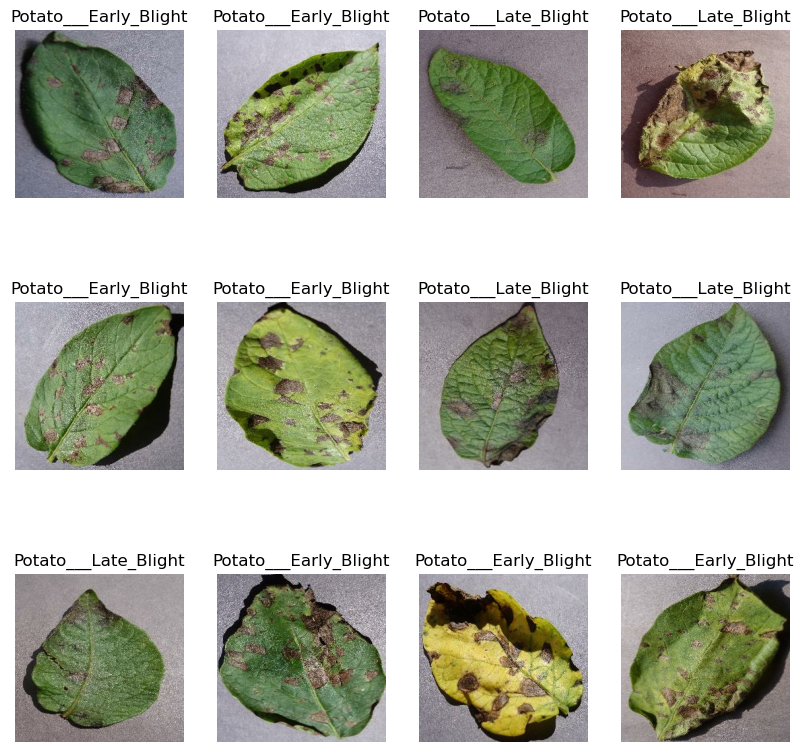

In [45]:
plt.figure(figsize=(10,10))
from numpy import uint16
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
      plt.subplot(3,4,i+1)
      plt.imshow(image_batch[i].numpy().astype("uint16"))
      plt.title(class_names[label_batch[i]])
      plt.axis("off")

**TRAIN TEST SPLIT**

80 % TRAINING

20 % VALIDATION (10% validation + 10% Test)

#### Function to Divide Dataset into train , validation and test

In [46]:
def get_dataset_partitions_tf(dataset, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(dataset)

    if shuffle:
        dataset = dataset.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_dataset = dataset.take(train_size)
    val_dataset = dataset.skip(train_size).take(val_size)
    test_dataset = dataset.skip(train_size).skip(val_size)

    return train_dataset, val_dataset, test_dataset

In [47]:
train_dataset, val_dataset, test_dataset = get_dataset_partitions_tf(dataset)

In [48]:
len(train_dataset)

54

In [49]:
len(val_dataset)

6

In [50]:
len(test_dataset)

8

### Cache, Shuffle, and Prefetch Dataset

In [51]:
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = val_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# BUILDING MODEL

### RESIZE & RESCALE

In [52]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

### DATA AUGMENTATION

In [53]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

## MODEL ARCHITECTURE

In [54]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation="relu",input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [55]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_9 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_10 (Sequential)  (32, 256, 256, 3)         0         
                                                                 
 conv2d_41 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_41 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_42 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_42 (MaxPooli  (32, 62, 62, 64)          0         
 ng2D)                                               

### Model Complilation

#### We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric

In [56]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [57]:
history = model.fit(
    train_dataset,
    batch_size=BATCH_SIZE,
    validation_data=val_dataset,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/50
54/54 [==============================] - 83s 1s/step - loss: 0.8881 - accuracy: 0.5006 - val_loss: 0.7972 - val_accuracy: 0.4740
Epoch 2/50
54/54 [==============================] - 65s 1s/step - loss: 0.5907 - accuracy: 0.7188 - val_loss: 0.4233 - val_accuracy: 0.8177
Epoch 3/50
54/54 [==============================] - 60s 1s/step - loss: 0.3966 - accuracy: 0.8287 - val_loss: 0.3199 - val_accuracy: 0.8750
Epoch 4/50
54/54 [==============================] - 57s 1s/step - loss: 0.3109 - accuracy: 0.8698 - val_loss: 0.2647 - val_accuracy: 0.8958
Epoch 5/50
54/54 [==============================] - 54s 1s/step - loss: 0.3094 - accuracy: 0.8704 - val_loss: 0.2515 - val_accuracy: 0.9062
Epoch 6/50
54/54 [==============================] - 43s 790ms/step - loss: 0.2557 - accuracy: 0.8993 - val_loss: 0.2369 - val_accuracy: 0.8958
Epoch 7/50
54/54 [==============================] - 40s 734ms/step - loss: 0.2038 - accuracy: 0.9236 - val_loss: 0.2040 - val_accuracy: 0.9219
Epoch 8/50
54/

### MODEL EVALUATION

In [58]:
result = model.evaluate(test_dataset)

8/8 [==============================] - 3s 162ms/step - loss: 0.0227 - accuracy: 0.9922


In [60]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [61]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

loss = history.history['loss']
validation_loss = history.history['val_loss']

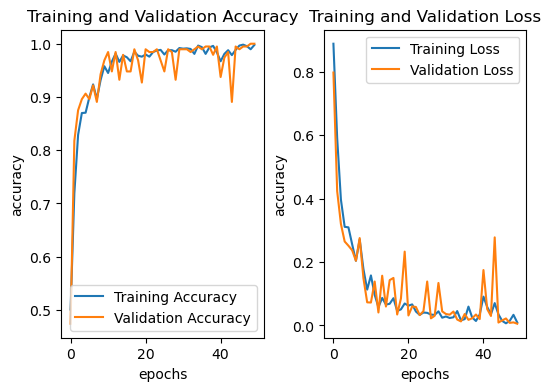

In [62]:
plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), accuracy, label='Training Accuracy')
plt.plot(range(EPOCHS), validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title('Training and Validation Loss')
plt.subplots_adjust(wspace=0.3)
plt.show()

## Running Prediction on sample images

In [63]:
import numpy as np
def predict(model, image):
    image_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    image_array = tf.expand_dims(image_array, 0)

    predictions = model.predict(image_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 39ms/step


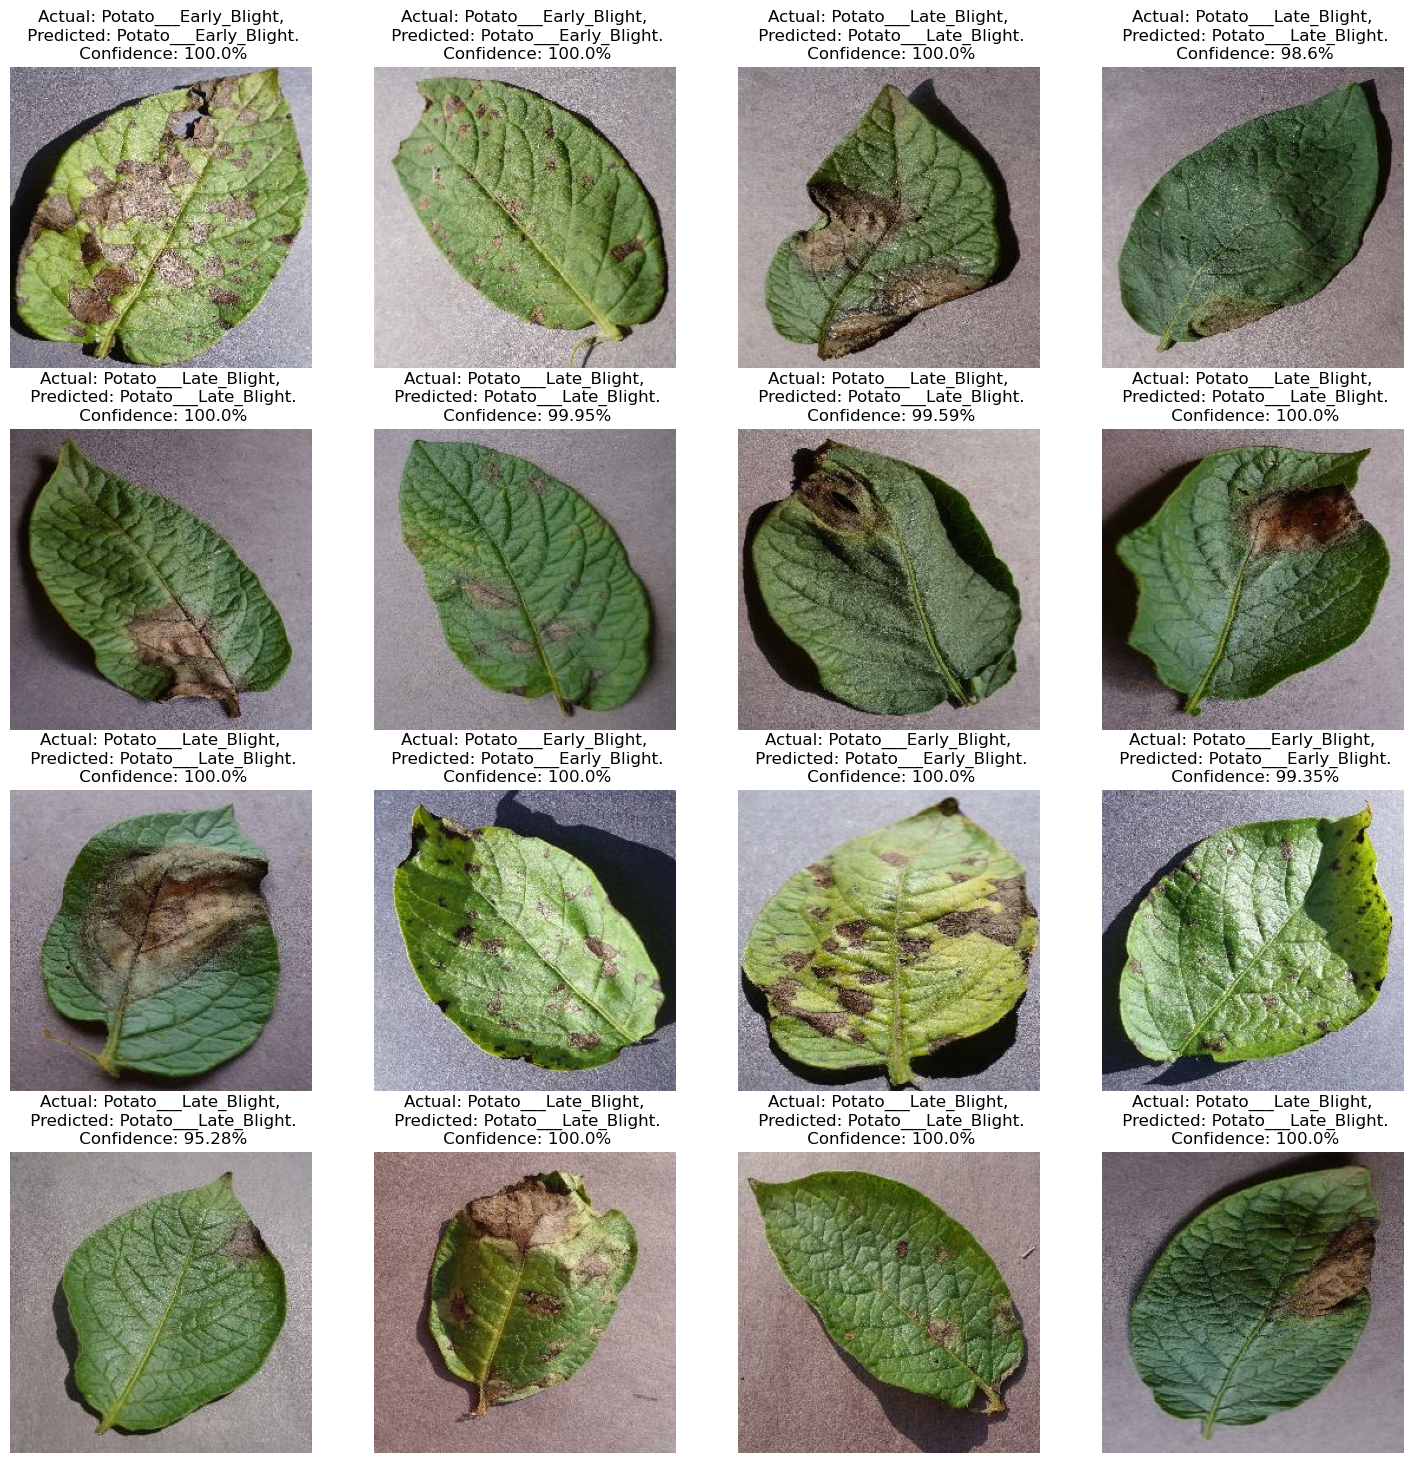

In [64]:
plt.figure(figsize=(18, 18))
for images, labels in test_dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

## Model Performance Evaluation using Confusion Matrix

In [69]:
from sklearn.metrics import confusion_matrix
import random

# Create empty lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Randomly sample a subset of test images
subset_test_dataset = test_dataset.unbatch().shuffle(13325, seed=42).batch(1000)

for images, labels in subset_test_dataset:
    for i in range(len(images)):
        true_labels.append(labels[i].numpy())
        predicted_class, _ = predict(model, images[i].numpy())
        predicted_labels.append(class_names.index(predicted_class))

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 35ms/step


In [70]:
cm

array([[102,   0,   0],
       [  0,  19,   0],
       [  1,   1, 133]], dtype=int64)

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(true_labels, predicted_labels)
precision_micro = precision_score(true_labels, predicted_labels, average='micro')
recall_micro = recall_score(true_labels, predicted_labels, average='micro')
f1_micro = f1_score(true_labels, predicted_labels, average='micro')

In [75]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision_micro}")
print(f"Recall: {recall_micro}")
print(f"F1-Score: {f1_micro}")

Accuracy: 0.9921875
Precision: 0.9921875
Recall: 0.9921875
F1-Score: 0.9921875


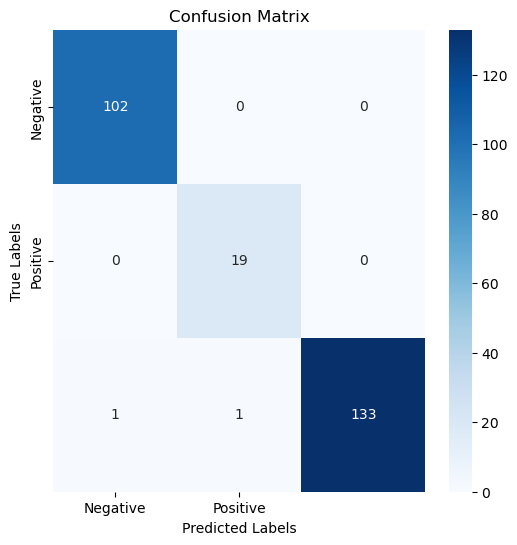

In [77]:
import seaborn as sns
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [79]:
model_version = 1
model_name = "Base_model"  
model.save(f"../imageclassification/models/{model_name}_v{model_version}")

INFO:tensorflow:Assets written to: ../imageclassification/models/Base_model_v1\assets


INFO:tensorflow:Assets written to: ../imageclassification/models/Base_model_v1\assets
